In [6]:
import pandas as pd #판다스 불러오기

In [7]:
import numpy as np

In [8]:
train = pd.read_csv('./movies_train.csv') #처음 불러올 때, 판다스 위치 설정 중요

In [9]:
print(train)

         title   distributor genre release_time  time screening_rat director  \
0       개들의 전쟁      롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가      조병옥   
1         내부자들        (주)쇼박스   느와르   2015-11-19   130      청소년 관람불가      우민호   
2    은밀하게 위대하게        (주)쇼박스    액션   2013-06-05   123       15세 관람가      장철수   
3     나는 공무원이다        (주)NEW   코미디   2012-07-12   101        전체 관람가      구자홍   
4         불량남녀  쇼박스(주)미디어플렉스   코미디   2010-11-04   108       15세 관람가      신근호   
..         ...           ...   ...          ...   ...           ...      ...   
595         해무        (주)NEW   드라마   2014-08-13   111      청소년 관람불가      심성보   
596       파파로티        (주)쇼박스   드라마   2013-03-14   127       15세 관람가      윤종찬   
597      살인의 강     (주)마운틴픽쳐스    공포   2010-09-30    99      청소년 관람불가      김대현   
598     악의 연대기     CJ 엔터테인먼트   느와르   2015-05-14   102       15세 관람가      백운학   
599        베를린     CJ 엔터테인먼트    액션   2013-01-30   120       15세 관람가      류승완   

     dir_prev_bfnum  dir_prev_num  num_

In [10]:
test = pd.read_csv('./movies_test.csv')

In [11]:
submission = pd.read_csv('./submission.csv')

In [12]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [13]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [14]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [15]:
print(train.shape) #shape : 데이터 프레임 행, 열 개수 저장 속성 확인
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [16]:
train.info() #column별 정보 알려주는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [17]:
test.info() #7번 컬럼 값 채워야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [18]:
train.describe() # e+xx 제곱승

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [19]:
pd.options.display.float_format = '{:.1f}'.format #원래 숫자로 변경

In [20]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num') #train 데이터와 장르, 컬럼수를 선택, groupby로 장르를 묶고, 평균값으로 정렬 

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [21]:
pd.reset_option('display.float_format') #복구

In [22]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [23]:
import seaborn as sns #히트맵 임포트

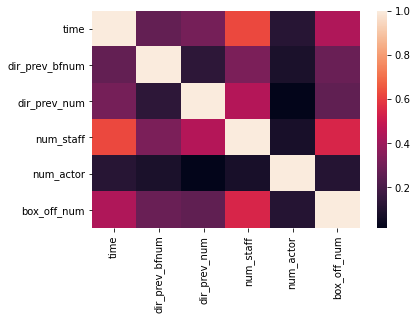

In [24]:
sns.heatmap(train.corr()). annot = True #히트맵 그리기

In [25]:
#전처리 과정

In [26]:
train.isna().sum() #결측치 확인

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [27]:
train.isna().sum() / 600 #컬럼수로 나누면 %확인가능

title             0.00
distributor       0.00
genre             0.00
release_time      0.00
time              0.00
screening_rat     0.00
director          0.00
dir_prev_bfnum    0.55
dir_prev_num      0.00
num_staff         0.00
num_actor         0.00
box_off_num       0.00
dtype: float64

In [28]:
train[train['dir_prev_bfnum'].isna()] #결측값 있는 부분만 추출

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [29]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum() #중간에도 0으로 채워져있는지 확인, 0으로 잡혀있는 컬럼 확인(더한 것으로)

0

In [30]:
train['dir_prev_bfnum'].fillna(0, inplace = True) #결측치 채우기(0으로 채운 후 저장(inplace))

In [31]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [32]:
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [33]:
train.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
box_off_num       0.0
dtype: float64

In [34]:
test.isna().sum() / 600

title             0.0
distributor       0.0
genre             0.0
release_time      0.0
time              0.0
screening_rat     0.0
director          0.0
dir_prev_bfnum    0.0
dir_prev_num      0.0
num_staff         0.0
num_actor         0.0
dtype: float64

In [35]:
# 모델링 과정

In [36]:
import lightgbm as lgb

In [37]:
# X(상영시간, 영화 제작에 참여한 스태프 수, 배우 수...)->Model->y(영화 관객 수)

In [38]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [39]:
#랜덤 스테이트 : 똑같은 값이 어떤 컴퓨터에서 하든 나오게 만들기. n.estimator = 1000개를 반복해서 순차적으로 만들겠다.

In [40]:
#LightGBM = Trainning API, Scikit-learn API) 부스팅 모델, 순차적으로 만듦. 기존 모델이 못 맞춘 문제에 가중치를 두어 지속적으로 학습 이어나감.

In [41]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor'] #features 변수에 4가지 컬럼 추가

In [42]:
target = ['box_off_num']

In [43]:
X_train, X_test, y_train = train[features], test[features], train[target] #taget은 y값, train의 x값과 test의 x값 적용

In [44]:
#모델학습 및 검증

In [45]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [46]:
singleLGBM = submission.copy()

In [47]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [48]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [49]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

In [50]:
#K-fold 교차검증 : 각각의 데이터를 등분하여 하나씩 학습에 사용하지 않고 모델을 검증할 때 사용(회귀분석에서의 전진선택, 후진선택과 비슷), 과대적합 방지, 모델 간 일반적 성능 비교 목적

In [51]:
#k_fold 교차검증

In [52]:
from sklearn.model_selection import KFold

In [53]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [54]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [55]:
for train_idx, val_idx in k_fold.split(X_train):
    print(train_idx,val_idx)
    break #값 겹치지 않게 5등분으로 나눔

[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  19  20
  23  27  28  29  30  31  32  33  34  35  37  38  40  41  42  43  44  45
  48  49  50  51  53  57  58  59  60  61  62  63  64  65  66  67  68  70
  71  72  74  76  77  78  79  80  81  82  83  84  85  87  91  92  93  94
  95  98  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 133 136 137 138 139
 140 141 142 144 147 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 218 219
 220 221 223 224 225 226 227 228 229 230 231 232 233 237 238 239 240 242
 243 244 245 248 249 250 251 253 254 257 258 259 260 261 263 264 265 266
 268 270 271 272 274 276 277 278 279 280 282 285 286 288 292 294 295 296
 297 298 299 300 301 302 303 305 306 307 308 309 31

In [56]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12
[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [57]:
models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100)) #오렌지(학습)은 그냥 넣기. 초록색은 eval_로 놓기, early는 100번 진행하는 동안 학습이 감소되지 않으면 멈추라는 뜻), vervose는 100번째마다 모델 출력값 산출

[100]	valid_0's l2: 1.77214e+12


In [58]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [59]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
    len(preds) #for를 써서 각각의 model에 대한 predict 진행, preds 리스트에 저장(예측모델)

In [60]:
kfoldLightGBM = submission.copy()

In [61]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [62]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0) #축(axis)를 가지고 평균

In [63]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3.367422e+06
1,아빠가 여자를 좋아해,9.611389e+05
2,하모니,1.097930e+06
3,의형제,2.097271e+06
4,평행 이론,7.814763e+05


In [64]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index = False)

In [65]:
#Feature engineering

In [66]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [67]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [68]:
train.genre #문자형으로 되어있음 

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #라벨인코더 : 형태 변경
train['genre'] = le.fit_transform(train['genre']) #고유 단어에 번호 순차적 부여, 값으로 치환

In [70]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [71]:
test['genre'] = le.transform(test['genre'])  #fit은 각각의 단어를 학습하는 과정, 다시 학습할 필요가 없으니 transform만 진행

In [72]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [73]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [74]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose =100))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.62067e+12
[100]	valid_0's l2: 4.39227e+12
[100]	valid_0's l2: 3.29841e+12
[100]	valid_0's l2: 1.56499e+12
[100]	valid_0's l2: 1.60118e+12


In [75]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,3.005290e+05,2
1,113,4,275,3,3.427002e+05,5
2,115,3,419,7,4.206611e+06,4
3,116,2,408,2,6.913420e+05,10
4,110,1,380,1,3.173800e+04,1


In [76]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
    len(preds) #for를 써서 각각의 model에 대한 predict 진행, preds 리스트에 저장(예측모델)

In [77]:
feLightGBM = submission.copy()

In [78]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [79]:
feLightGBM.to_csv('feLightGBM.csv', index = False)

In [80]:
# Grid Search(모델튜닝) 모델 안에 여러 옵션이 존재하는데, 옵션이 바뀔 때마다 성능이 달라질 수 있음(ex : 하이퍼파라미터 변경 등)

In [81]:
from sklearn.model_selection import GridSearchCV

In [90]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate' : [0.1, 0.01, 0.003],
    'min_child_samples' : [20, 30]} #러닝레이트, 민차일드샘플 6개 조합, 러닝메이트 : 순차적 진행할 때 학습을 기존 모델의 것을 다음모델에 얼마나 반영할 것인가. min_child_samples : 파라미터 설정

gs = GridSearchCV(estimator=model,
            param_grid=params,
            scoring='neg_mean_squared_error',
            cv = k_fold) #그리드 객체 만들기, param_grid  : 저장, 

In [91]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [89]:
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

In [92]:
model = lgb.LGBMRegressor(random=777, n_estimator=1000, learning_rate = 0.003, min_child_samples=30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.56673e+12
[100]	valid_0's l2: 4.89194e+12
[100]	valid_0's l2: 3.14361e+12
[100]	valid_0's l2: 1.60592e+12
[100]	valid_0's l2: 1.96107e+12


In [93]:
preds = []
for model in models:
    preds.append(model.predict(X_test))

In [94]:
gs.best_score_

-2334525343085.6494

In [97]:
gslgbm = submission.copy()

In [98]:
gslgbm['box_off_num'] = np.mean(preds, axis = 0)

In [101]:
gslgbm.to_csv('gslgbm.csv', index = False)